In [2]:
!pip install librosa

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import librosa
import librosa.display
import IPython.display as ipd

22050
[ 0.          0.          0.         ...  0.00036545  0.00025941
 -0.00021183]


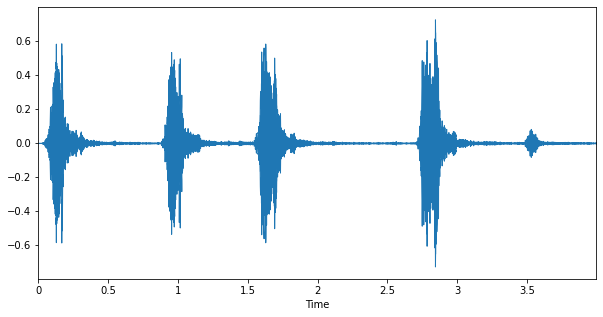

In [5]:
filename = ("/content/drive/MyDrive/Minor Project/Sound.wav")
plt.figure(figsize=(10,5))

# Displays wave form of data and sample rate recieved 
data , sample_rate = librosa.load(filename)
librosa.display.waveplot(data , sr = sample_rate)  #LIBROSA CONVERTS SIGNAL INTO MONO CHANNEL i.e. single channel
#PLays audio
ipd.Audio(filename)

 
print(sample_rate)
print(data)


#Sample_rate = The sampling rate refers to the number of samples of audio recorded every second. 
#It is measured in samples per second or Hertz (abbreviated as Hz or kHz, with one kHz being 1000 Hz). 
#An audio sample is just a number representing the measured acoustic wave value at a specific point in time

In [6]:
import pandas as pd
import numpy as np
from tqdm import tqdm

metadata = pd.read_csv("/content/drive/MyDrive/Minor Project/UrbanSound8K/metadata/UrbanSound8K.csv")
print(metadata)

         slice_file_name    fsID       start  ...  fold  classID             class
0       100032-3-0-0.wav  100032    0.000000  ...     5        3          dog_bark
1     100263-2-0-117.wav  100263   58.500000  ...     5        2  children_playing
2     100263-2-0-121.wav  100263   60.500000  ...     5        2  children_playing
3     100263-2-0-126.wav  100263   63.000000  ...     5        2  children_playing
4     100263-2-0-137.wav  100263   68.500000  ...     5        2  children_playing
...                  ...     ...         ...  ...   ...      ...               ...
8727     99812-1-2-0.wav   99812  159.522205  ...     7        1          car_horn
8728     99812-1-3-0.wav   99812  181.142431  ...     7        1          car_horn
8729     99812-1-4-0.wav   99812  242.691902  ...     7        1          car_horn
8730     99812-1-5-0.wav   99812  253.209850  ...     7        1          car_horn
8731     99812-1-6-0.wav   99812  332.289233  ...     7        1          car_horn

[87

In [7]:
 '''
 DATA = metadata.head(20)
 DATA.iloc[1]['start']
 '''

"\nDATA = metadata.head(20)\nDATA.iloc[1]['start']\n"

In [8]:

def features_extractor(file):
  #filename = "/content/drive/MyDrive/Minor Project/UrbanSound8K/audio/fold{}/{}".format(metadata.iloc[i]["fold"],metadata.iloc[i]["slice_file_name"])
  data,sr = librosa.load(filename , res_type='kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y = data , sr=sr , n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
  return mfccs_scaled_features


In [12]:
import numpy as np 
import os as os
from tqdm import tqdm
extracted_features = []
for index_num,row in tqdm(metadata.iterrows()):
  filename = os.path.join(os.path.abspath("/content/drive/MyDrive/Minor Project/UrbanSound8K/audio/"),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
  final_class_labels= row["class"]
  data=features_extractor(filename)
  extracted_features.append([data,final_class_labels])

3555it [37:25,  1.47it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [1:32:59,  1.64it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [1:33:01,  1.61it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [1:37:42,  1.49it/s]


In [20]:
Data = pd.DataFrame(extracted_features,columns=["Features","Class"])
Features = np.array(Data["Features"].tolist())

Class = np.array(Data["Class"].tolist())
print(Features)

print(Class)

[[-2.15793015e+02  7.16661224e+01 -1.31813766e+02 ... -1.68275905e+00
  -8.85858238e-01  3.54388624e-01]
 [-4.24686768e+02  1.10562271e+02 -5.41482353e+01 ...  6.17408633e-01
  -6.84974074e-01  5.71514428e-01]
 [-4.59564667e+02  1.22800354e+02 -4.79247093e+01 ...  2.22541404e+00
   1.54661798e+00 -8.36315691e-01]
 ...
 [-3.04613159e+02  1.12619904e+02 -4.71619453e+01 ... -3.03358078e+00
   2.71057296e+00  7.67189503e+00]
 [-3.44714233e+02  1.26758141e+02 -5.61771698e+01 ... -7.80225849e+00
  -1.77907360e+00  5.83541918e+00]
 [-3.15933838e+02  9.56758881e+01 -3.80477676e+01 ...  5.77580512e-01
  -1.14637651e+01 -5.96535349e+00]]
['dog_bark' 'children_playing' 'children_playing' ... 'car_horn'
 'car_horn' 'car_horn']


In [22]:
Class_ = pd.get_dummies(Class)


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Features,Class_,train_size=0.2,random_state=0)

In [41]:
print(X_train,y_train)

[[-3.0633170e+02  1.4802086e+02 -1.5899812e+01 ... -5.1457338e+00
  -4.2918172e+00 -5.6642246e+00]
 [-3.3058130e+02  2.4216910e+02 -2.2019115e+01 ...  1.1878932e-01
  -7.4800295e-01 -3.6139092e-01]
 [-5.4307560e+01 -8.5185671e+00 -4.9616684e+01 ... -5.4808997e-02
  -8.8522464e-01  2.6737165e+00]
 ...
 [-4.2699329e+02  9.2890648e+01  3.0233369e+00 ...  8.6335993e-01
   6.4766800e-01  7.8490508e-01]
 [-1.4607024e+02  1.3709459e+02 -3.4298344e+01 ...  1.3777871e+00
  -1.9530842e+00 -8.9652115e-01]
 [-4.2167450e+02  2.1169032e+02  2.6820304e+00 ... -5.1484952e+00
  -3.6400859e+00 -1.3321606e+00]]       air_conditioner  car_horn  ...  siren  street_music
6655                0         0  ...      0             0
5400                1         0  ...      0             0
1546                0         0  ...      0             0
1335                1         0  ...      0             0
6385                0         0  ...      1             0
...               ...       ...  ...    ...         

In [42]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [43]:
model = Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4100      
                                                                 
 activation_8 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 activation_9 (Activation)   (None, 200)               0         
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [53]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 110
num_batch_size = 16

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/110
106/110 [===========================>..] - ETA: 0s - loss: 0.7892 - accuracy: 0.7459
Epoch 00001: val_loss improved from inf to 0.98939, saving model to saved_models/audio_classification.hdf5
110/110 [==============================] - 2s 12ms/step - loss: 0.7862 - accuracy: 0.7474 - val_loss: 0.9894 - val_accuracy: 0.7276
Epoch 2/110
 94/110 [========================>.....] - ETA: 0s - loss: 0.7845 - accuracy: 0.7447
Epoch 00002: val_loss improved from 0.98939 to 0.97982, saving model to saved_models/audio_classification.hdf5
110/110 [==============================] - 2s 15ms/step - loss: 0.7810 - accuracy: 0.7446 - val_loss: 0.9798 - val_accuracy: 0.7267
Epoch 3/110
 98/110 [=========================>....] - ETA: 0s - loss: 0.8296 - accuracy: 0.7392
Epoch 00003: val_loss improved from 0.97982 to 0.94167, saving model to saved_models/audio_classification.hdf5
110/110 [==============================] - 1s 10ms/step - loss: 0.8134 - accuracy: 0.7440 - val_loss: 0.9417 - val_a

In [54]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7409104108810425


In [61]:
model.save("/content/drive/MyDrive/Minor Project/Saved Model/")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Minor Project/Saved Model/assets
